# Jamboree - Linear Regression Assignment

##  Import the Dataset & Initial Exploration

In [101]:
import  pandas as pd

In [102]:
data = pd.read_csv('Jamboree.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [104]:
print(data.describe())

       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR         CGPA    Research  Chance of Admit   
count  500.00000  500.000000  500.000000         500.00000  
mean     3.48400    8.576440    0.560000           0.72174  
std      0.92545    0.604813    0.496884           0.14114  
min      1.00000    6.800000    0.000000           0.34000  
2

### Dropping [Serial No.] as it does not affect the model

In [105]:
data.drop(columns=['Serial No.'], inplace=True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


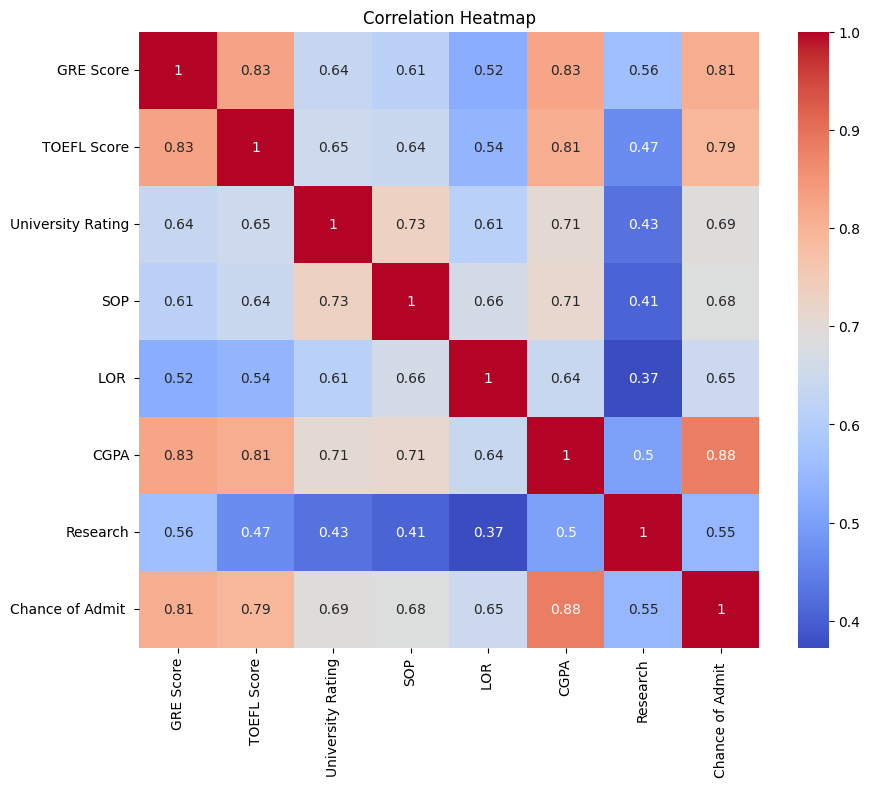

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns



# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()




In [107]:
import statsmodels.api as sm

X = data.drop(columns=['Chance of Admit '])
X = sm.add_constant(X)

y = data['Chance of Admit ']
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Tue, 19 Nov 2024   Prob (F-statistic):          8.21e-180
Time:                        18:39:18   Log-Likelihood:                 701.38
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2757      0.10

# Coeff of determination is 0.822

It is shown that University rating and SOP has P value >0.05....So Im removing them

In [108]:
data.drop(columns=['SOP'] ,inplace=True)
data.head()

,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,9.65,1,0.92
1,324,107,4,4.5,8.87,1,0.76
2,316,104,3,3.5,8.00,1,0.72
3,322,110,3,2.5,8.67,1,0.80
4,314,103,2,3.0,8.21,0,0.65


Checking the model summary ,again

In [109]:
import statsmodels.api as sm

X = data.drop(columns=['Chance of Admit '])
X = sm.add_constant(X)

y = data['Chance of Admit ']
model = sm.OLS(y,X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     379.1
Date:                Tue, 19 Nov 2024   Prob (F-statistic):          4.29e-181
Time:                        18:39:20   Log-Likelihood:                 701.32
No. Observations:                 500   AIC:                            -1389.
Df Residuals:                     493   BIC:                            -1359.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2800      0.10

In [110]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [111]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cols = X.columns
X[cols] = sc.fit_transform(X[cols])

In [112]:
model.fit(X,y)

LinearRegression()

In [113]:
model.score(X,y)

0.8218569929358553

In [114]:
y_hat = model.predict(X)

print('Predicted')
print(y_hat[:3])
print('Actual')
print(y[:3])

Predicted
[0.95184278 0.80405726 0.65356837]
Actual
0    0.92
1    0.76
2    0.72
Name: Chance of Admit , dtype: float64


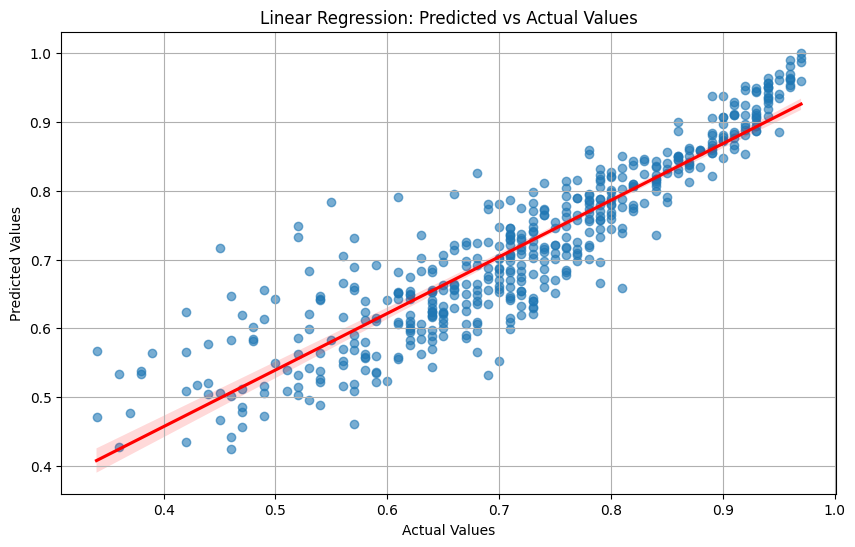

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.DataFrame({'Actual': y, 'Predicted': y_hat})

plt.figure(figsize=(10, 6))
sns.regplot(x='Actual', y='Predicted', data=data, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.6})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Predicted vs Actual Values')
plt.grid(True)
plt.show()


# Thus the best fit line is shown